In [2]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
dataset = fetch_california_housing()

In [6]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
import pandas as pd


In [11]:
df = pd.DataFrame(dataset.data,columns= dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
df['Price'] = dataset.target

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


first we have to divide feature feature into dependent and independent feature, it is the first step

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
import seaborn as sns

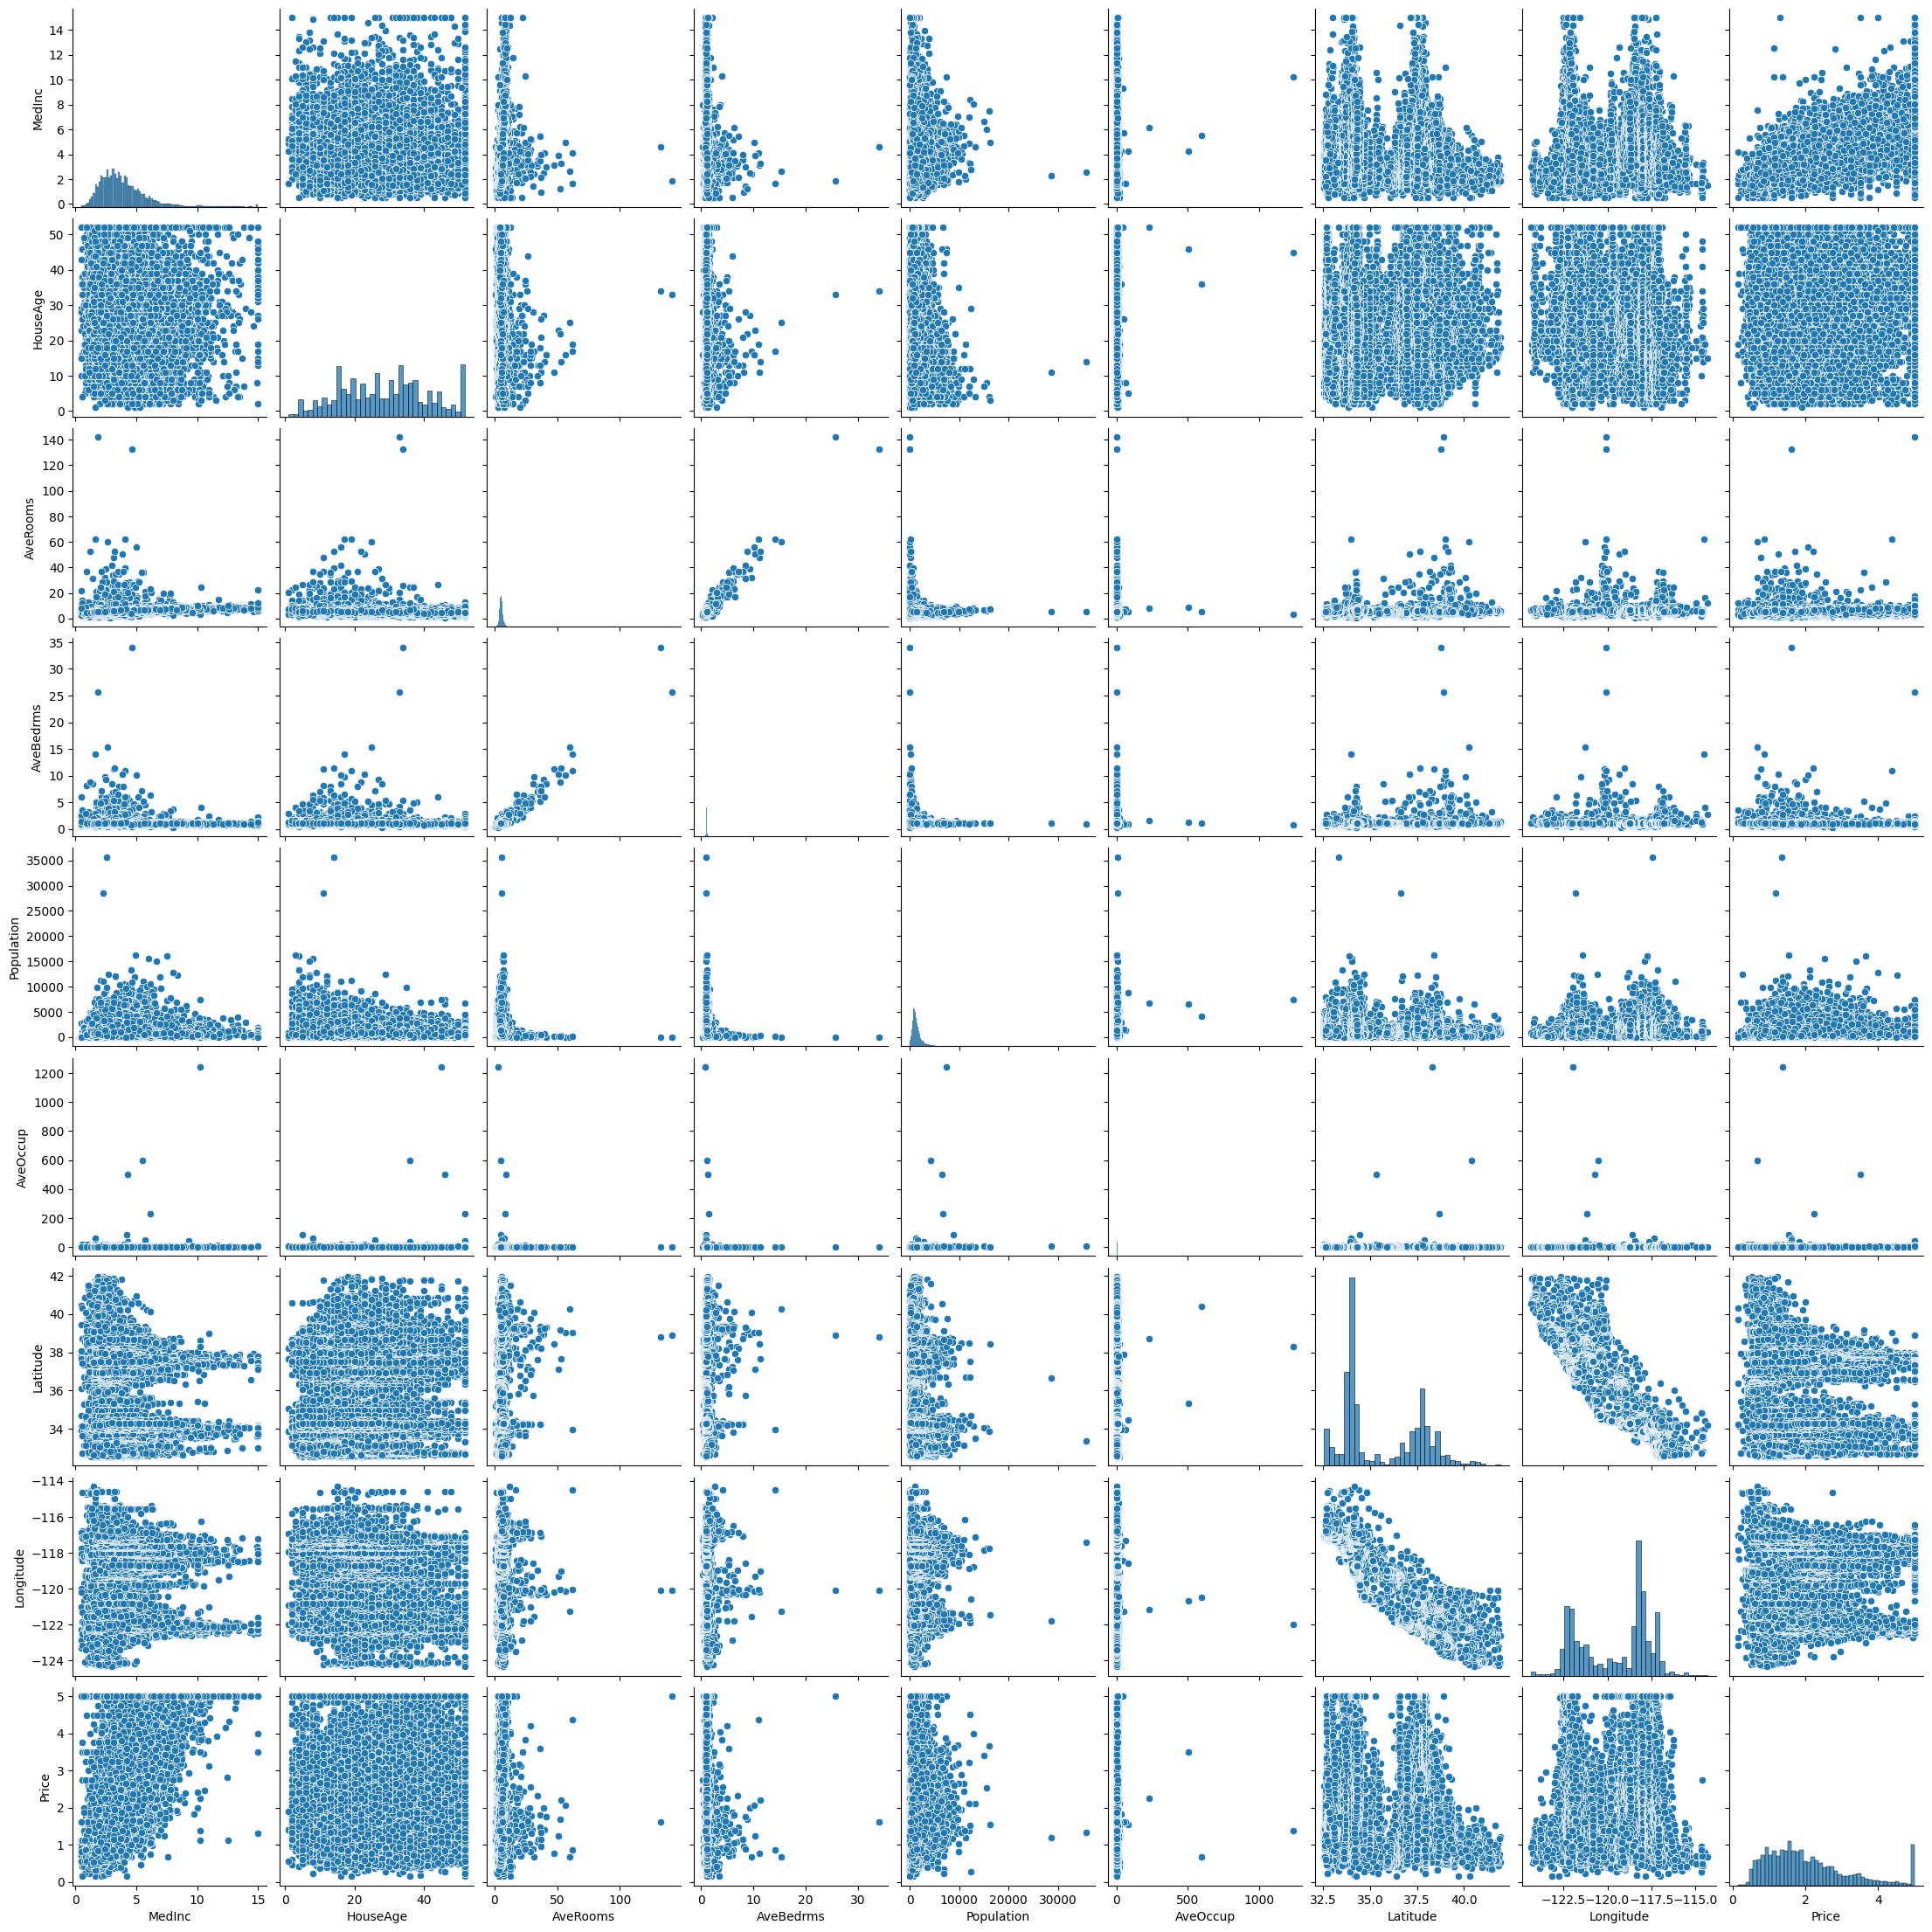

In [17]:
sns.pairplot(df)

In [18]:
df_copy = df.sample(frac=0.25)

In [19]:
df_copy.shape

(5160, 9)

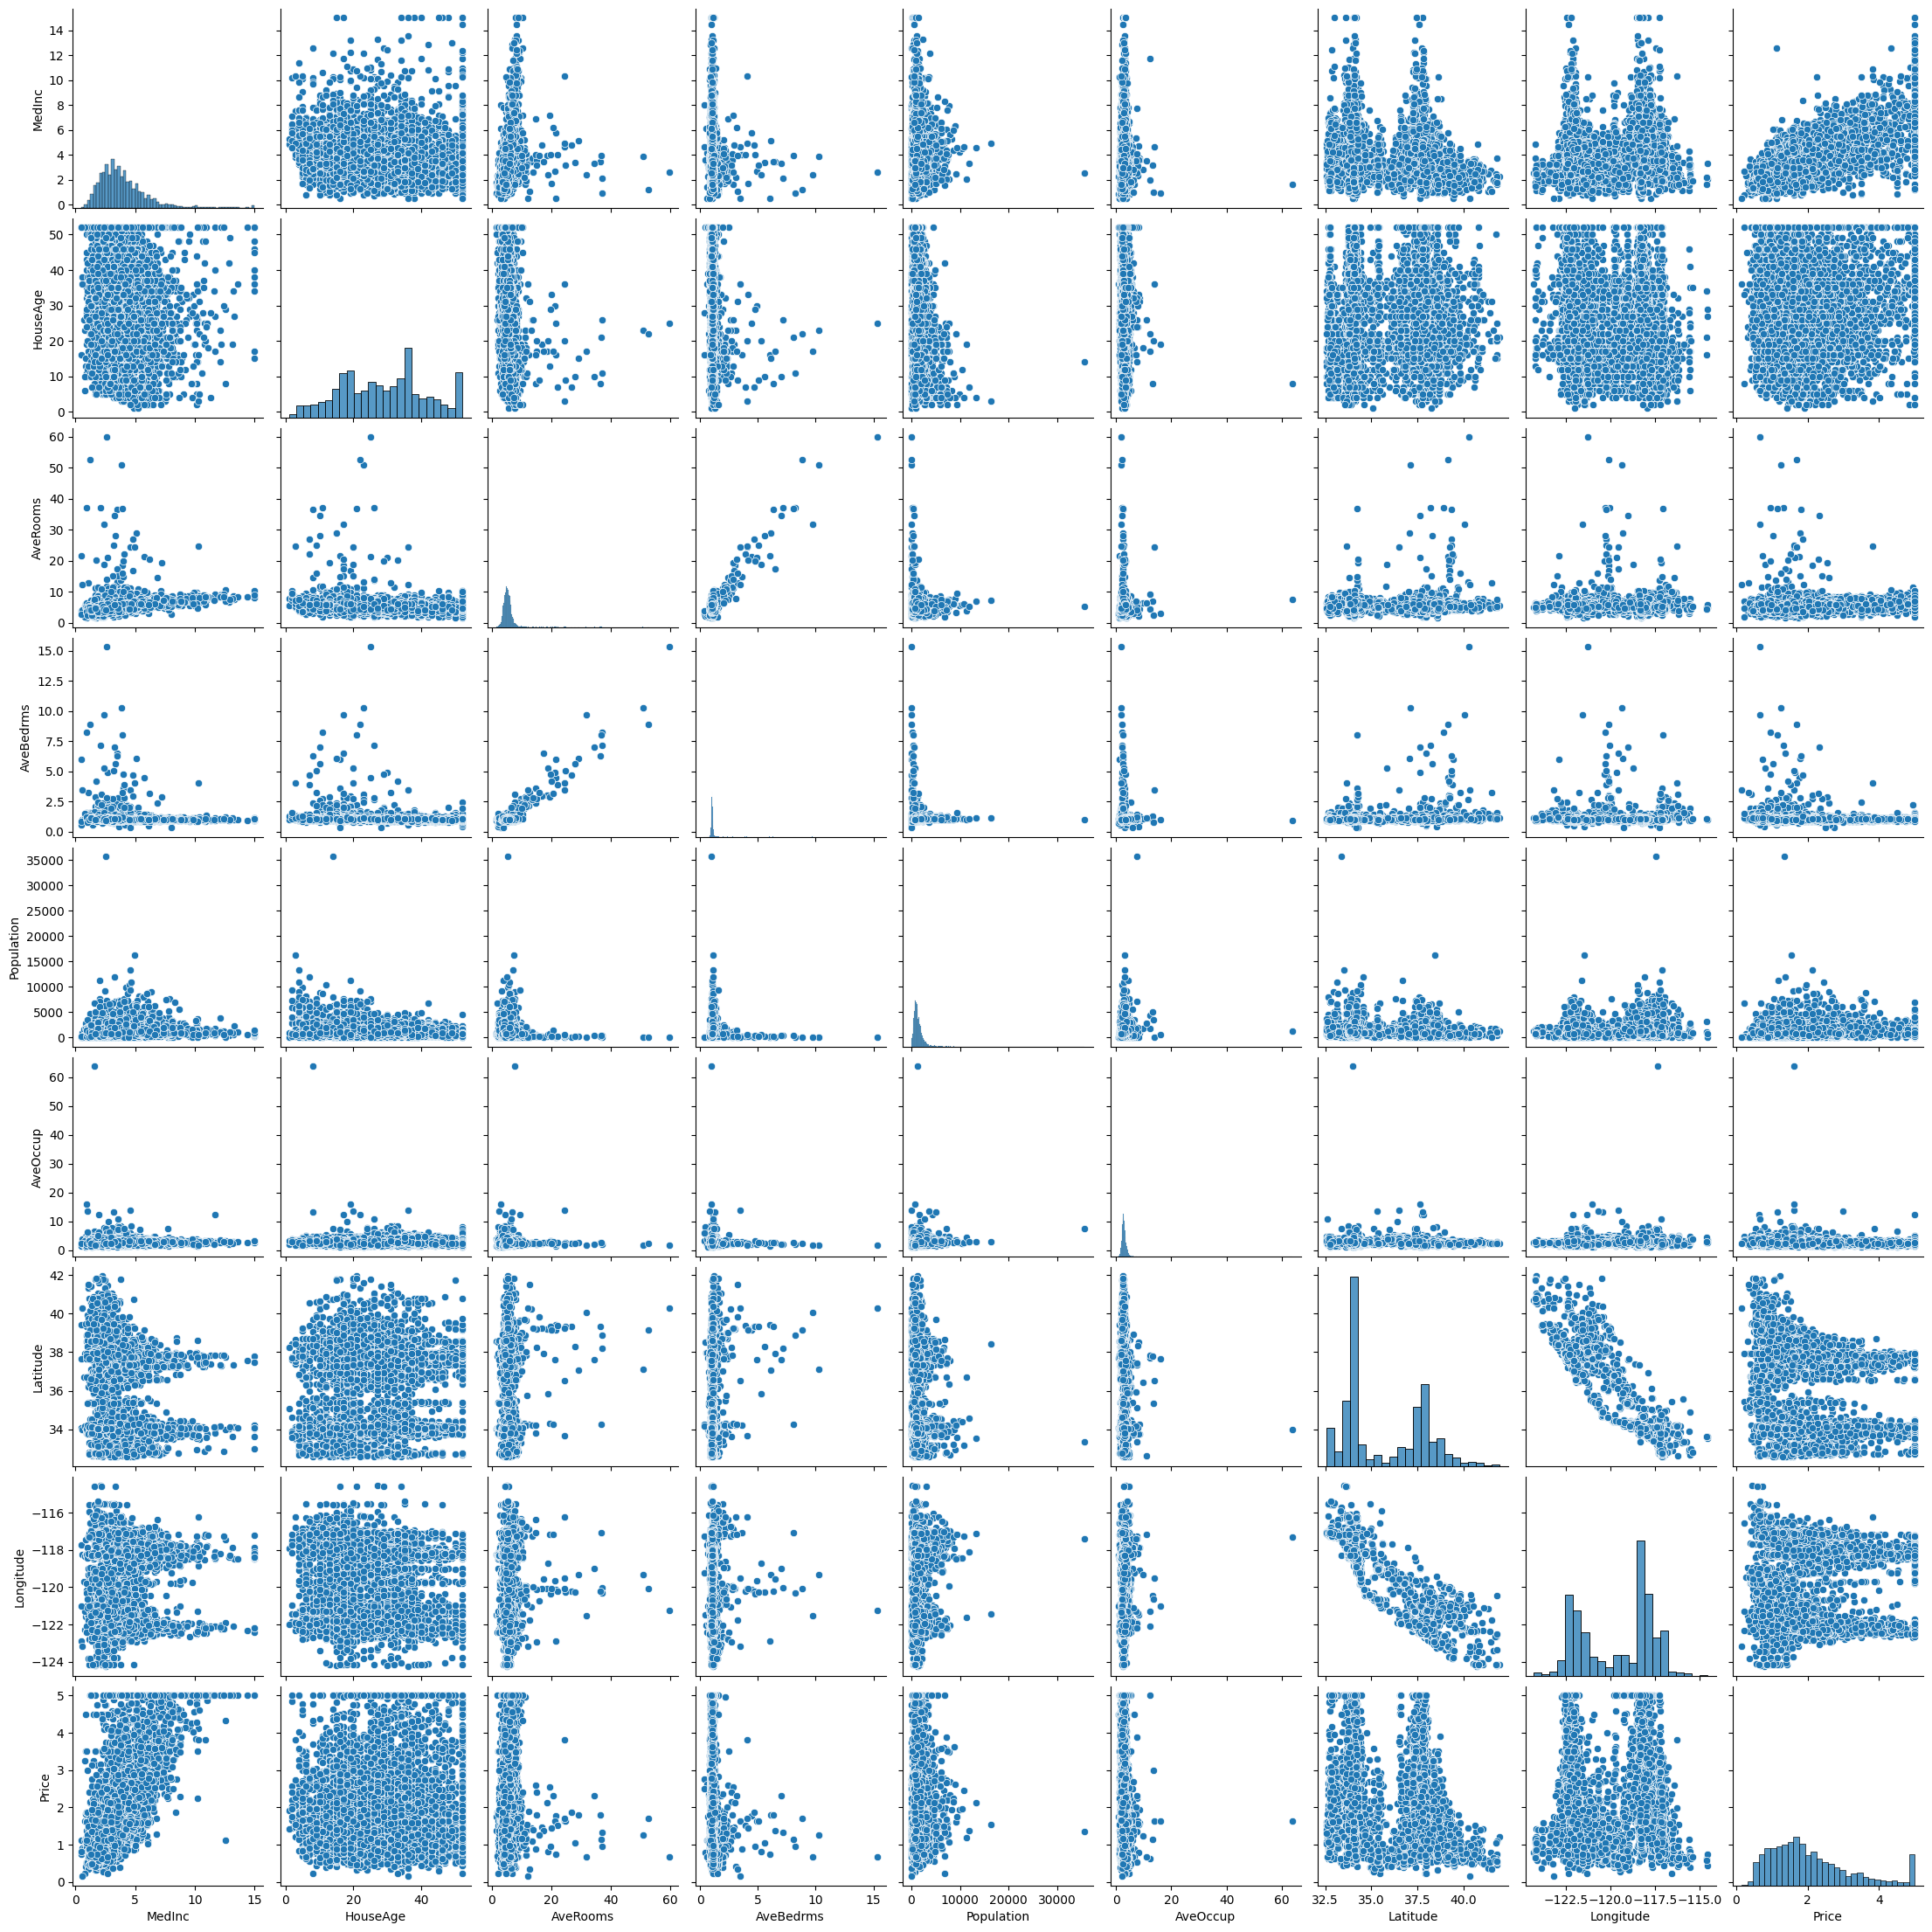

In [20]:
sns.pairplot(df_copy)

**Divide the dataset into independent and dependent features**

**DIVIDE THE DATASET INTO TRAIN AND TEST**

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96


In [25]:
X_train.shape,X_test.shape

((13828, 8), (6812, 8))

In [26]:
X.shape

(20640, 8)

Feature Scaling - Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

**Model training**

train test split  : model sekection

preprocessing  : standard scaler

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

How many  slopes come over here


In [33]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [34]:
regression.intercept_
# when all the features is zero , so what is the minimum price of house

2.0666362048018536

**Prediction**

In [35]:
Y_predict = regression.predict(X_test)

**MSE, MAE ,RMSE**

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
import numpy as np
mse = mean_squared_error(y_test, Y_predict)
print(mse)
mae = mean_absolute_error(y_test,Y_predict)
print(mae)
print(np.sqrt(mse))

0.5369686543372459
0.5295710106684453
0.7327814505957735


**Accuracy R square & Adjusted R square**

In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(y_test,Y_predict)
print(score)

0.5970494128783952


In [40]:
#display adjusted R-squared
adr2 = 1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

is adjusted r2 is grater than or lesss than  r square

it will always will be less

In [41]:
print(adr2)

0.5968931623477872


#Ridge regression

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [51]:
y_predr = ridge.predict(X_test)
print(y_predr)

[0.7260455  1.76629798 2.70503652 ... 1.25857212 1.66710506 2.2579446 ]


In [52]:
mse = mean_squared_error(y_test,y_predr)
print(mse)
mae = mean_absolute_error(y_test,y_predr)
print(mae)
print(np.sqrt(mse))

0.5369457054801822
0.5295668709657081
0.7327657916962159


#Lasso

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [55]:
y_predr = lasso.predict(X_test)
print(y_predr)

[2.0666362 2.0666362 2.0666362 ... 2.0666362 2.0666362 2.0666362]


In [56]:
mse = mean_squared_error(y_test,y_predr)
print(mse)
mae = mean_absolute_error(y_test,y_predr)
print(mae)
print(np.sqrt(mse))

1.3326257277946882
0.9126511897647483
1.15439409553007


So we find that lasso is giving maximum error than we should not have to use it

#Elastic Net

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
EL  = ElasticNet()
EL.fit(X_train,y_train)

ElasticNet()

In [59]:
y_predr = EL.predict(X_test)
print(y_predr)

[1.84037768 1.92798341 2.02576052 ... 2.06238572 2.12012657 1.94981013]


In [60]:
mse = mean_squared_error(y_test,y_predr)
print(mse)
mae = mean_absolute_error(y_test,y_predr)
print(mae)
print(np.sqrt(mse))

1.061031401183927
0.8119183692654035
1.0300637850074756


we also getting high error due to Elastic Net so we don;t consider this method

in feature selection we have to check correlation

In [61]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.103689,0.337676,-0.072314,0.007268,-0.053373,-0.097623,-0.000715,0.691278
HouseAge,-0.103689,1.000000,-0.177052,-0.098069,-0.287436,-0.020198,0.009362,-0.112927,0.121280
AveRooms,0.337676,-0.177052,1.000000,0.829287,-0.073562,-0.020645,0.121690,-0.030367,0.141231
AveBedrms,-0.072314,-0.098069,0.829287,1.000000,-0.073481,-0.052511,0.102660,-0.003739,-0.072699
Population,0.007268,-0.287436,-0.073562,-0.073481,1.000000,0.127886,-0.122619,0.108250,-0.023744
AveOccup,-0.053373,-0.020198,-0.020645,-0.052511,0.127886,1.000000,-0.113689,0.121740,-0.171847
Latitude,-0.097623,0.009362,0.121690,0.102660,-0.122619,-0.113689,1.000000,-0.924122,-0.135000
Longitude,-0.000715,-0.112927,-0.030367,-0.003739,0.108250,0.121740,-0.924122,1.000000,-0.060749
Price,0.691278,0.121280,0.141231,-0.072699,-0.023744,-0.171847,-0.135000,-0.060749,1.000000
